# Individual Exercise: 

This exercise is designed to be challenging but fun. We intentionally chose a task that you may not have encountered before because we want to see how you tackle fresh problems. 

- DO provide well-written explanations 
- DO comment your code 
- DO provide docstrings to your functions 

# Optimising how we implement linear regression 
## Scenario: 

Linear Regression is very useful for real-world machine learning. For example, we can use this algorithm to predict how far the disease of a diabetes patient has progressed one year after baseline. For this exercise, we are using a dataset collected from 442 people measuring 10 physiological characteristics such as age, sex and bmi. The dataset is included in Python's scikit-learn and a full description is here : http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

You can access the dataset from the aiap-workshop folder as `diabetes.tab.txt`

# Question 1

**1.1** Access the scikit-learn source code for linear regression https://github.com/scikit-learn/scikit-learn/blob/14031f6/sklearn/linear_model/base.py#L417  
**1.2** From the source code, what Numerical Linear Algebra method is scikit-learn using to implement Linear Regression?  
**1.3** In your own words, describe how this method works

In [ ]:
## your answer here 
1.2: Ordinary least squares

1.3: Goal of Ordinary least squares or OLS is to reduce to sum of squared errors between the predicted regression line and
    the actual observed results.
    Summing the errors between the actual and predicted values and using the results to determine the line/path with the lowest
    erros.
    While plotting the regression line, the algorithm calculates the best fitting slope and y-intercept taking into account the
    errors between the actual and predicted values

# Question 2

**2.1** Run Linear Regression on this dataset  
**2.2** How fast does our code run?  
**2.3** How would you measure model performance? 

In [1]:
2.1
## your answer here 
# Import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# load data
data = datasets.load_diabetes()
predictors = data.data
target = data.target

C:\Dev\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Not much information is given with regards to the dataset, unable to determine which is the dependent variable
# Will work under assumption that Y is the dependent variable
# Based on correlation, Y has the highest value with BMI at ~0.59

# Create classifier
reg_clf = LinearRegression()

# Split data into training and test sets to prevent overfitting
pred_train, pred_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

# Fit training data into classifier
reg_clf.fit(pred_train, target_train)

# Print R-Squared score
print ('R-Squared: ', reg_clf.score(pred_test, target_test))

R-Squared:  0.332222032691


In [3]:
2.2 The code seems to run pretty fast < 5 seconds

SyntaxError: invalid syntax (<ipython-input-3-6db1134f0476>, line 1)

In [ ]:
2.3 I will measure the performance of the model using its R-Sqaured score which measures the relationship between the predictors
and the target variable. In the above, the variance is ~33% which is quite low

In [10]:
# Reload data
pands_data = pd.read_csv('C:/Users/Leo Tay/Desktop/stats-questions-LeoTSH/diabetes.tab.txt', sep='\t')
predict = pands_data['AGE'].reshape(-1, 1)
target = pands_data['Y'].reshape(-1, 1)

# Split data into training and test sets to prevent overfitting
pred_train, pred_test, target_train, target_test = train_test_split(predict, target, test_size = 0.2, random_state = 0)

# Fit training data into classifier
reg_clf.fit(pred_train, target_train)

# Print R-Squared score
print ('R-Squared: ', reg_clf.score(pred_test, target_test))

# Using AGE as the predictor variable, we are able to slightly increase the R-Score

R-Squared:  0.0340003830886


C:\Dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


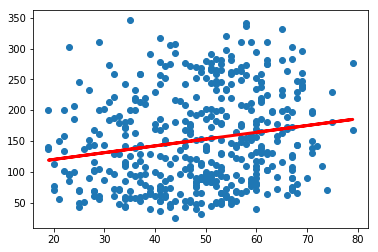

In [11]:
plt.scatter(x=predict, y=target)
plt.plot(pred_train, reg_clf.predict(pred_train), color='red', linewidth=3)
plt.show()

# Question 3

**3.1** Can you speed up how fast the code runs? (this is quite an open-ended question. bonus points for considering and implementing different approaches)   
**3.2** Can you implement Linear Regression with a method different from the one used by scikit-learn? (bonus points for comparing different implementation methods) 

In [6]:
## your answer here 
3.1 

3.2 Linear Regression can also be implemented together with Gradient Descent which starts from a point and gradually work 
downwards towards the regression line and determine the path with the lowest errors/cost functions